### Import Modules

In [270]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use("fivethirtyeight") # styling the charts


# modeling 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

print("All modules loaded")

All modules loaded


### Import Data

In [511]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

##  <font color= darkred> Data Inspection</font>🔍📊 

In [512]:
df.shape

(7043, 21)

In [513]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [515]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [516]:
df.describe(include = 'object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [517]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [518]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [519]:
df.duplicated().sum()

0

In [520]:
df['Churn'] = df['Churn'].replace({'No': 0,  'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'No': 0,  'Yes': 1})
df['PhoneService'] = df['StreamingMovies'].replace({'No': 0,  'Yes': 1})
df['Partner'] = df['Partner'].replace({'No': 0,  'Yes': 1})
df['Dependents'] = df['Dependents'].replace({'No': 0,  'Yes': 1})

In [522]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,0,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,0,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,0,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [523]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##   <font color= darkred> EDA </font>

In [524]:
df['Churn'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

,Churn
0,73.46%
1,26.54%


In [525]:
df['Churn'].value_counts(normalize= True).round(4).multiply(100).plot(kind = 'bar', backend = 'plotly')

In [526]:
df['gender'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

,gender
Male,50.48%
Female,49.52%


In [527]:
df.groupby('gender')['Churn'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [528]:
df.groupby('InternetService')['Churn'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [529]:
df.groupby('TechSupport')['Churn'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [530]:
df['Partner'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

,Partner
0,51.70%
1,48.30%


In [531]:
df.groupby('Partner')['Churn'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [532]:
df.groupby('Churn')['tenure'].mean().plot(kind = 'bar', backend = 'plotly')

In [533]:
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind = 'bar', backend = 'plotly')

In [534]:
df['Contract'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

,Contract
Month-to-month,55.02%
Two year,24.07%
One year,20.91%


In [535]:
df.groupby('Contract')['Churn'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [536]:
df.groupby('SeniorCitizen')['Churn'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [537]:
df['PaperlessBilling'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

,PaperlessBilling
1,59.22%
0,40.78%


In [538]:
df.groupby('PaperlessBilling')['Churn'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [539]:
df['PaymentMethod'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

,PaymentMethod
Electronic check,33.58%
Mailed check,22.89%
Bank transfer (automatic),21.92%
Credit card (automatic),21.61%


In [540]:
df.groupby('PaymentMethod')['Churn'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

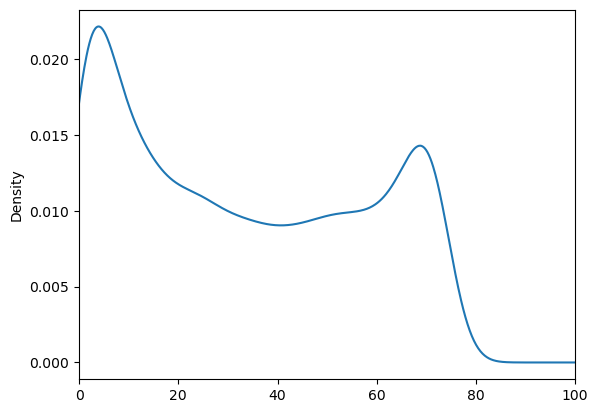

In [541]:
df['tenure'].plot(kind = 'kde', xlim = (0, 100));

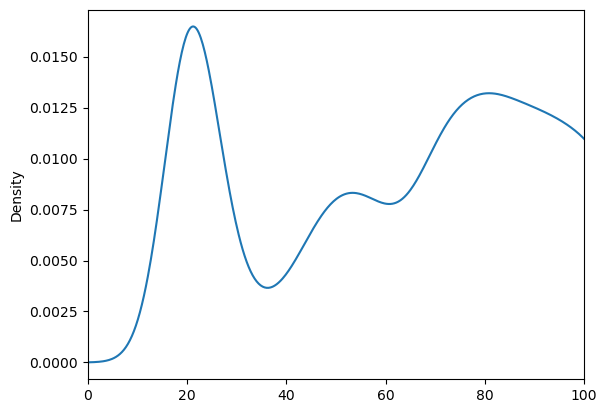

In [542]:
df['MonthlyCharges'].plot(kind = 'kde', xlim = (0, 100));

In [543]:
df.groupby('gender')['Churn'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [544]:
df.groupby('tenure')['Churn'].mean().multiply(100).plot(kind = 'bar', backend = 'plotly')

In [545]:
df.groupby('Churn')['MonthlyCharges'].mean().round()

Churn
0    61.0
1    74.0
Name: MonthlyCharges, dtype: float64

In [546]:
pd.crosstab(df['Churn'], df['Contract'], normalize= True).round(2)

Contract,Month-to-month,One year,Two year
Churn,,,
0,0.32,0.19,0.23
1,0.23,0.02,0.01


In [547]:
pd.crosstab(df['Churn'], df['PaymentMethod'], normalize= True).round(2)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
0,0.18,0.18,0.18,0.19
1,0.04,0.03,0.15,0.04


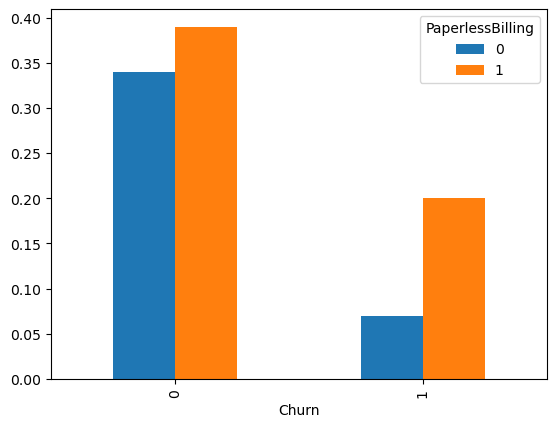

In [548]:
pd.crosstab(df['Churn'], df['PaperlessBilling'], normalize= True).round(2).plot(kind = 'bar');

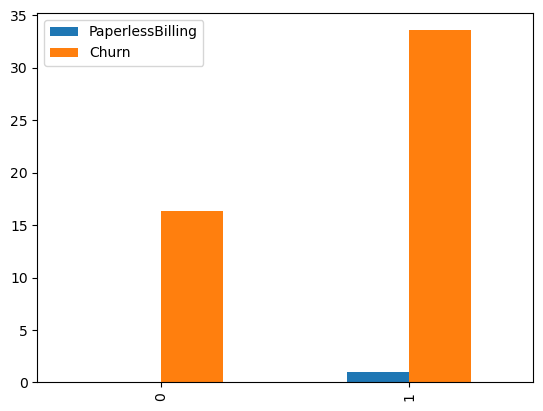

In [549]:
x = df.groupby(['PaperlessBilling'])['Churn'].mean().multiply(100).reset_index()
x.plot(kind = 'bar');

In [550]:
pd.crosstab(df['Churn'], df['Partner'], normalize= True).round(2)

Partner,0,1
Churn,,
0,0.35,0.39
1,0.17,0.09


In [551]:
pd.crosstab(df['Churn'], df['SeniorCitizen'], normalize= True).round(2)

SeniorCitizen,0,1
Churn,,
0,0.64,0.09
1,0.20,0.07


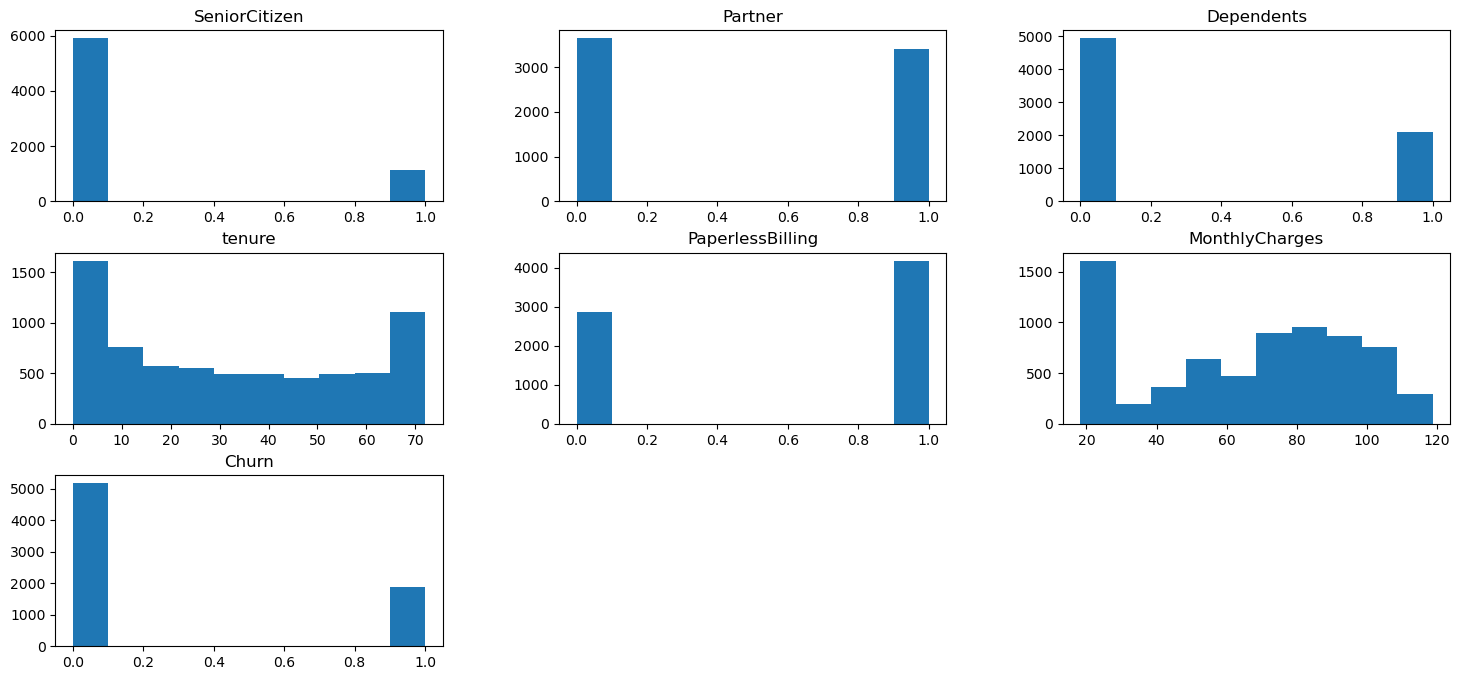

In [552]:
df.hist(figsize=(18,8), grid = False);

In [553]:
df.drop(columns = ['customerID', 'TotalCharges'], inplace = True)

In [554]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,0
1,Male,0,0,0,34,0,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,0
2,Male,0,0,0,2,0,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,0
4,Female,0,0,0,2,0,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,1


In [555]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [556]:
df.drop(columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies'], inplace = True)

In [558]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,1,0,1,DSL,No,Month-to-month,1,Electronic check,29.85,0
1,Male,0,0,0,34,DSL,No,One year,0,Mailed check,56.95,0
2,Male,0,0,0,2,DSL,No,Month-to-month,1,Mailed check,53.85,1
3,Male,0,0,0,45,DSL,Yes,One year,0,Bank transfer (automatic),42.30,0
4,Female,0,0,0,2,Fiber optic,No,Month-to-month,1,Electronic check,70.70,1


In [559]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [560]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
InternetService        3
TechSupport            3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
Churn                  2
dtype: int64

In [561]:
df_x = pd.get_dummies(df)

In [563]:
df_x.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,gender_Female,gender_Male,InternetService_DSL,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,0,0,1,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [565]:
df.isna().isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

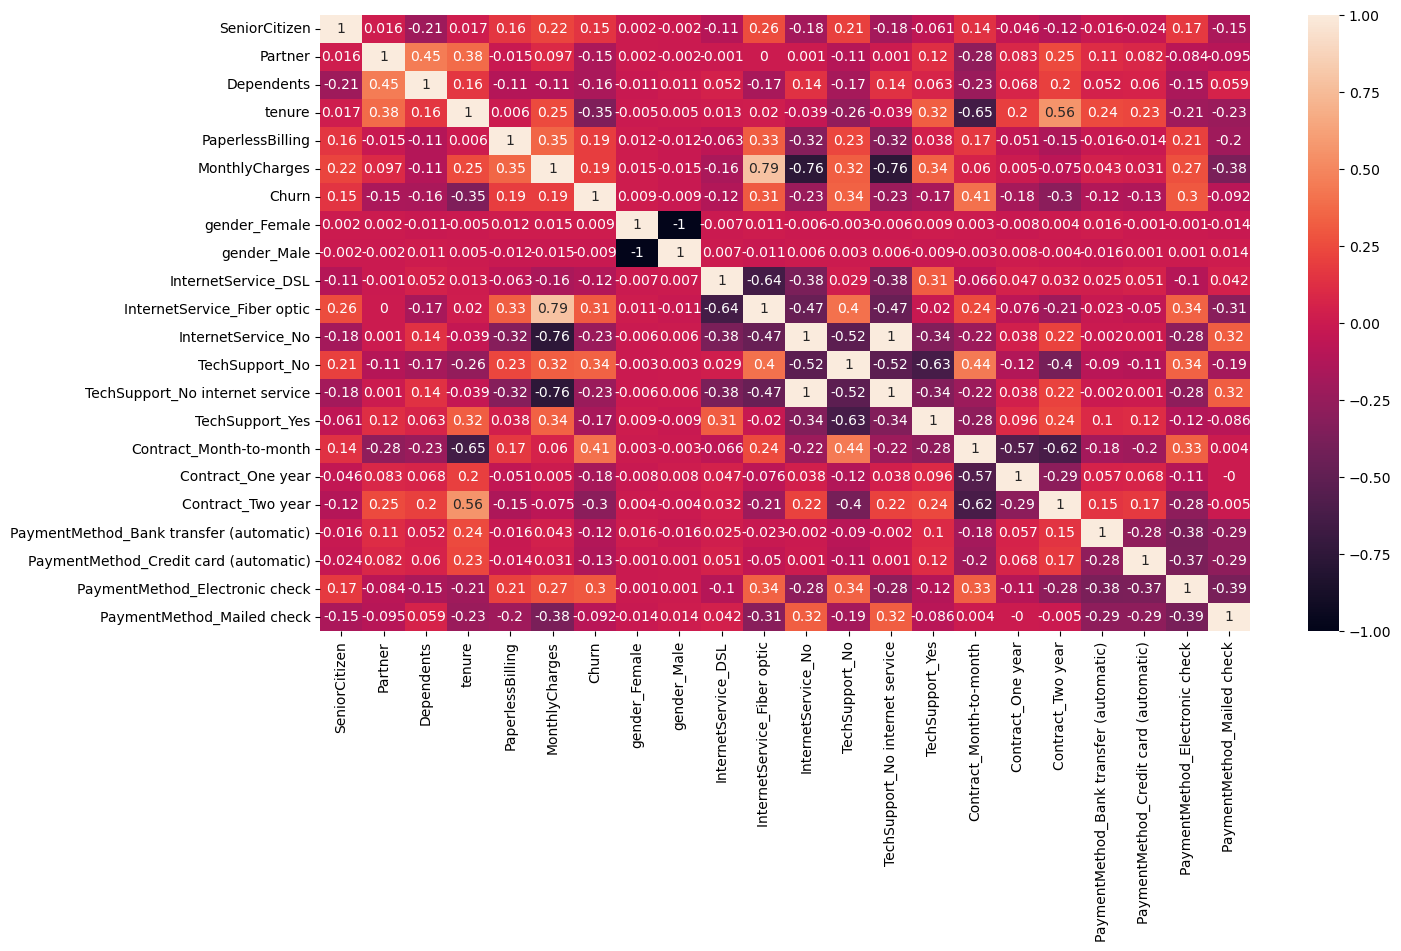

In [566]:
corr = df_x.corr().round(3)
plt.figure(figsize= (15,8))
sns.heatmap(corr, annot= True);

##  <font color= darkred> Data Prep for Modeling </font>

### Train-Test Split

In [623]:
from sklearn.model_selection import train_test_split

In [624]:
# splitting the data 
X = df_x.drop(columns = 'Churn')
y = df_x['Churn']

In [625]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [626]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)


print("\n")

print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (5634, 21)
y_train:  (5634,)


x_test:  (1409, 21)
y_test:  (1409,)


In [627]:
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4169,0,0,0,15,1,101.25,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
3571,0,0,0,35,1,62.10,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1352,0,1,1,72,0,60.95,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
1278,0,1,1,36,0,60.70,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
938,0,1,0,65,1,108.05,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [628]:
x_train.isna().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PaperlessBilling                           0
MonthlyCharges                             0
gender_Female                              0
gender_Male                                0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
TechSupport_No                             0
TechSupport_No internet service            0
TechSupport_Yes                            0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
dtype: int64

### Scaling 

In [629]:
to_be_scaled_cols = ['tenure', 'MonthlyCharges']

In [630]:
from sklearn.preprocessing import StandardScaler

# intiate 
scaler = StandardScaler()

# fit and transform 
x_train_scaled = scaler.fit_transform(x_train[to_be_scaled_cols])

# transform 
x_test_scaled = scaler.transform(x_test[to_be_scaled_cols])

In [631]:
type(x_test_scaled)

numpy.ndarray

In [632]:
x_train[to_be_scaled_cols].columns

Index(['tenure', 'MonthlyCharges'], dtype='object')

In [633]:
x_train_scaled = pd.DataFrame(x_test_scaled, columns = x_train[to_be_scaled_cols].columns)

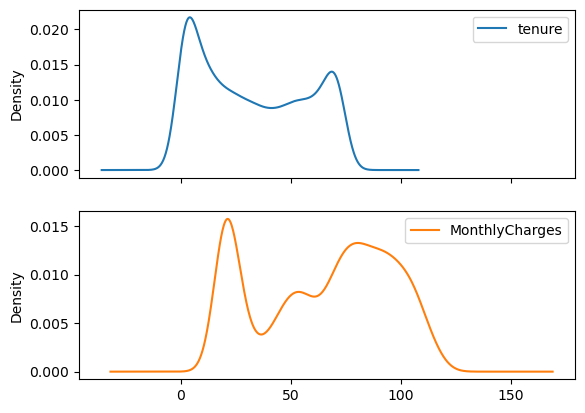

In [634]:
# pre-scaling kde
x_train[to_be_scaled_cols].plot(kind = 'kde', subplots = True);

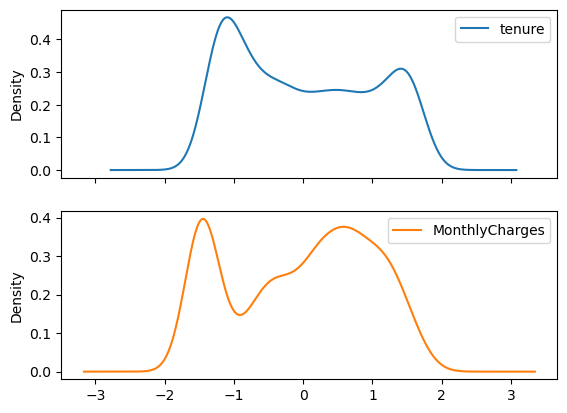

In [635]:
# post scaling kde
x_train_scaled.plot(kind = 'kde', subplots = True);

## <font color= darkred> Model building </font> 

### Dummy classifier model

In [636]:
from sklearn.dummy import DummyClassifier

In [637]:
# call the model 
dummy = DummyClassifier()

# fit the model
dummy.fit(x_train, y_train)

DummyClassifier()

In [638]:
print("The accuracy score of the model for Train is {:.2f}".format(dummy.score(x_train, y_train)))

print("The accuracy score of the model for Test is {:.2f}".format(dummy.score(x_test, y_test)))

The accuracy score of the model for Train is 0.73
The accuracy score of the model for Test is 0.75


### Logistic regression model

In [639]:
from sklearn.linear_model import LogisticRegression

In [640]:
# call the model 
lr = LogisticRegression()

# fit the model 
lr.fit(x_train, y_train)

LogisticRegression()

In [641]:
print("The accuracy score of the model for Train is {:.2f}".format(lr.score(x_train, y_train)))

print("The accuracy score of the model for test is {:.2f}".format(lr.score(x_test, y_test)))

The accuracy score of the model for Train is 0.80
The accuracy score of the model for test is 0.80


### KNN Model

In [642]:
from sklearn.neighbors import KNeighborsClassifier

In [643]:
# call the model
knn = KNeighborsClassifier()

# fit the model 
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [644]:
print("The accuracy score of the model for Train is {:.2f}".format(knn.score(x_train, y_train)))

print("The accuracy score of the model for test is {:.2f}".format(knn.score(x_test, y_test)))

The accuracy score of the model for Train is 0.84
The accuracy score of the model for test is 0.78


### SVC Model

In [235]:
from sklearn.svm import SVC

In [237]:
svc = SVC()

# fit the model 
svc.fit(x_train, y_train)

SVC()

In [324]:
print("The accuracy score of the model for Train is {:.2f}".format(svc.score(x_train, y_train)))

print("The accuracy score of the model for test is {:.2f}".format(svc.score(x_test, y_test)))

The accuracy score of the model for Train is 0.79
The accuracy score of the model for test is 0.80


### Decision Tree Classifier Model

In [241]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
# call the model
dt = DecisionTreeClassifier()

# fit the model 
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [332]:
print("The accuracy score of the model for Train is {:.2f}".format(dt.score(x_train, y_train)))

print("The accuracy score of the model for test is {:.2f}".format(dt.score(x_test, y_test)))

The accuracy score of the model for Train is 1.00
The accuracy score of the model for test is 0.73


### Random Forrest Model


In [328]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
rf = RandomForestClassifier()

# fit the model 
rf.fit(x_train, y_train)

RandomForestClassifier()

In [331]:
print("The accuracy score of the model for Train is {:.2f}".format(rf.score(x_train, y_train)))
print("The accuracy score of the model for test is {:.2f}".format(rf.score(x_test, y_test)))

The accuracy score of the model for Train is 1.00
The accuracy score of the model for test is 0.78
